<a href="https://colab.research.google.com/github/Manuelamejiah/Business-intelligence-/blob/main/Reto_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#se procede con la implementación del modelo

from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


Para el análisis y creación de los modelos se trabajará con 10 variables de entrada descritas de la siguiente forma

* Salary: Salario del jugador expresado en dólares
* Age: Edad del jugador en años.
* Height: Estatura del jugador expresada en pulgadas.
* Weight: Peso del jugadore expresado en libras.
* games_started: Número de partidos en los que el jugador fue titular.
* minutes_per_game: Promedio de minutos jugados por partido.
* assists: Número total de asistencias realizadas por el jugador en la temporada.
* blocks: Cantidad total de bloqueos defensivos hechos por el jugador.
* steals: Número total de robos de balón hechos por el jugador.

Por otro lado, se trabajará con una variable de salida que será el objetivo a evaluar con los modelos

games_played_bin: Variable categórica que indica si el número de juegos jugados por el jugador (games_played) está por encima (1) o por debajo (0) del promedio.

In [ ]:
nxl='/content/drive/MyDrive/ANALÍTICA DE NEGOCIOS /Parcial 1 /4. BD2_NBA_Data_M_Int.xlsx'
XDB=pd.read_excel(nxl)
XDB= XDB [['salary', 'age', 'height', 'weight', 'games_started', 'minutes_per_game', 'assists', 'blocks', 'steals', 'games_played']]
threshold = XDB['games_played'].mean()
XDB['games_played_bin'] = (XDB['games_played'] > threshold).astype(int)
XDB.dropna()
display(XDB)
#primnero seleccionamos variables y luego hacemos dropna

salary  age  height  weight  games_started  minutes_per_game  assists  \
0      947276   36      79     260            838              32.4      2.7   
1    25000000   37      78     212           1198              36.1      4.7   
2     4088019   39      78     220            954              32.4      3.4   
3     5675000   36      77     195            432              30.9      3.6   
4     5250000   40      83     250           1389              34.0      3.0   
..        ...  ...     ...     ...            ...               ...      ...   
440   1733040   19      78     202              6              14.3      0.6   
441   1140240   21      83     200              4              15.1      0.4   
442   1131960   20      81     220              0               4.2      0.0   
443   3102240   20      77     200             66              30.4      5.5   
444    525093   23      79     185              0               3.5      0.1   

     blocks  steals  games_played  games_played_bin  
0       0.5     1.8           966                 1  
1       0.5     1.4          1346                 1  
2       0.6     1.1          1274                 1  
3       0.2     1.0          1100                 1  
4       2.2     0.7          1392                 1  
..      ...     ...           ...               ...  
440     0.2     0.4            70                 0  
441     0.5     1.2            24                 0  
442     0.0     0.0             5                 0  
443     0.5     1.0            68                 0  
444     0.0     0.0            12                 0  

[445 rows x 11 columns]

In [ ]:
XD= XDB[['salary', 'age', 'height', 'weight', 'games_started', 'minutes_per_game', 'assists', 'blocks', 'steals']]
yd= XDB[['games_played_bin']]

In [ ]:
from sklearn.naive_bayes import GaussianNB

mnb = GaussianNB()
mnb.fit(XD, yd)

# Obtenemos información del modelo
u = mnb.theta_
print('La media de las variables es:\n', u)
var = mnb.var_
print('La varianza de las variables es:\n', var)
sigma = np.sqrt(var)
print('La desviación estándar de las variables es:\n', sigma)

#Así mismo, identificamos límites superiores e inferiores
LS = u + sigma
print('Límite superior:\n', LS)
LI = u - sigma
print('Límite inferior:\n', LI)


La media de las variables es:
 [[2.91582743e+06 2.41607843e+01 7.91647059e+01 2.19423529e+02
  6.52352941e+01 1.82878431e+01 1.46941176e+00 3.88627451e-01
  5.98431373e-01]
 [7.42986398e+06 3.04684211e+01 7.92684211e+01 2.24731579e+02
  4.09294737e+02 2.66994737e+01 2.51473684e+00 5.62105263e-01
  8.41578947e-01]]
La varianza de las variables es:
 [[1.15798849e+13 2.73523678e+04 2.73566841e+04 2.80171672e+04
  3.39158480e+04 2.74045416e+04 2.73465659e+04 2.73449991e+04
  2.73449589e+04]
 [3.68265886e+13 2.73570701e+04 2.73564280e+04 2.80246595e+04
  1.10096418e+05 2.73810055e+04 2.73484892e+04 2.73450417e+04
  2.73449657e+04]]
La desviación estándar de las variables es:
 [[3.40292300e+06 1.65385513e+02 1.65398561e+02 1.67383294e+02
  1.84162559e+02 1.65543171e+02 1.65367971e+02 1.65363234e+02
  1.65363112e+02]
 [6.06849146e+06 1.65399728e+02 1.65397787e+02 1.67405674e+02
  3.31807803e+02 1.65472069e+02 1.65373786e+02 1.65363363e+02
  1.65363133e+02]]
Límite superior:
 [[6.31875042e+06 

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
#Evaluamos un solicitante
XDS=[[5000000,37,82,245,45,17.8,0.5,1.4,0.4]]


ydp = mnb.predict(XDS)
print("La predicción del solicitante es:\n", ydp)

if ydp == 1:
  print("El jugador está sobre el promedio")

if ydp == 0:
  print("El jugador está por debajo del promedio")


La predicción del solicitante es:
 [0]
El jugador está por debajo del promedio


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [ ]:
from sklearn.metrics import confusion_matrix

#Hacemos un barrido de los datos
ydp2=mnb.predict(XD) #hacemos el pronóstico para todos los datos base
cm=confusion_matrix(yd,ydp2) #crea la matriz de confusión
print("La matriz de confusión es: \n",cm)
VN=cm[0,0];FP=cm[0,1];FN=cm[1,0];VP=cm[1,1]


Ex=(VP+VN)/(VP+VN+FP+FN)
print("La exactitud del modelo es: \n",Ex)
#todas las métricas que me den por encima del 75% es bueno.

#tasa de error: mal funcionamiento o error del modelo
TE=(FP+FN)/(VP+VN+FP+FN)
print("La tasa de error del modelo es: \n",TE)

SE=VP/(VP+FN) #Sensibilidad
print('La sensibilidad del modelo es:\n',SE)

SP=VN/(VN+FP) #Especificidad
print('La especificidad del modelo es:\n',SP)

PR=VP/(VP+FP) #Precisión
print('La precisión del modelo es:\n',PR)

PRNeng=VN/(VN+FN) #Precisión Negativa
print('La precisión negativa del modelo es:\n',PRNeng)

La matriz de confusión es: 
 [[236  19]
 [ 76 114]]
La exactitud del modelo es: 
 0.7865168539325843
La tasa de error del modelo es: 
 0.21348314606741572
La sensibilidad del modelo es:
 0.6
La especificidad del modelo es:
 0.9254901960784314
La precisión del modelo es:
 0.8571428571428571
La precisión negativa del modelo es:
 0.7564102564102564


**Análisis de resultados modelo Naive Bayes**

De acuerdo con la base de datos suministrada, se tomó como referencia para la clasificación de jugadores la cantidad de partidos jugados en relación con el promedio. Para esto, se utilizaron variables como salario, edad, altura, peso, juegos iniciados, minutos por juego, asistencias, bloqueos y robos para entrenar el modelo Naive Bayes.

La base de datos se dividió en dos categorías: jugadores con partidos jugados por debajo del promedio y jugadores con partidos jugados por encima del promedio. Se obtuvo un total de 236 clasificaciones correctas para jugadores por debajo del promedio y 114 clasificaciones correctas para jugadores por encima del promedio.

De manera general, el modelo alcanzó una exactitud del 78.65%, lo que indica un buen desempeño en la clasificación. La especificidad fue del 92.55%, lo que significa que el modelo identificó correctamente la mayoría de los jugadores con pocos partidos jugados. Sin embargo, la sensibilidad fue del 60%, lo que indica que el modelo tuvo más dificultades para clasificar correctamente a los jugadores con más partidos jugados.

El modelo también mostró una precisión del 85.71%, lo que significa que cuando predice que un jugador está por encima del promedio, en la mayoría de los casos acierta. Además, la precisión negativa fue del 75.64%, lo que indica que el modelo también tiene un desempeño aceptable al identificar jugadores por debajo del promedio.

Además, se evaluó el modelo con un jugador con las siguientes características:

 * Salario: 5,000,000
 * Edad: 37 años
 * Altura: 82 pulgadas
 * Peso: 245 libras
 * Juegos iniciados: 45
 * Minutos por juego: 17.8
 * Asistencias: 0.5
 * Bloqueos: 1.4
 * Robos: 0.4

El modelo de Naive Bayes clasificó a este jugador "Por debajo del promedio", lo que indica que, según su perfil, es menos probable que juegue una gran cantidad de partidos en comparación con el resto de la base de datos.

En conclusión, el modelo de Naive Bayes mostró un buen desempeño en la clasificación de jugadores, especialmente en la identificación de aquellos con menos partidos jugados.



2. Árbol de decisión

In [ ]:
mar=DecisionTreeClassifier(criterion='gini',max_depth=4)
mar.fit(XD,yd)

#se procede con la gráfica
from pydotplus import graph_from_dot_data #me crea la gráfica
from sklearn.tree import export_graphviz #me exporta a png, jpg, tiff

ve= ['salary', 'age', 'height', 'weight', 'games_started', 'minutes_per_game', 'assists', 'blocks', 'steals']
dot_data=export_graphviz(mar,feature_names=ve)
graph_from_dot_data(dot_data).write_png('2. ArbolDeDecisión_M.png')

num_nodos_puros = sum(mar.tree_.impurity == 0)
print(f"Número de nodos puros en el árbol (Gini = 0.0): {num_nodos_puros}")


Número de nodos puros en el árbol (Gini = 0.0): 6


In [ ]:
XDB0=pd.read_excel(nxl, sheet_name=0)
XDB0.head(100)

XD0=XDB0[['salary', 'age', 'height', 'weight', 'games_started', 'minutes_per_game', 'assists', 'blocks', 'steals']]

threshold = XDB0['games_played'].mean() # Calculate threshold from XDB0
XDB0['games_played_bin'] = (XDB0['games_played'] > threshold).astype(int)
YD0=XDB0[['games_played_bin']]

# Instead of looking for NaN values which likely don't exist,
# select rows where 'games_played_bin' is 0 (below average)
# This assumes you want to predict for those players.
# Adjust the condition if you intend to predict for a different group
filas = XDB0.index[XDB0['games_played_bin'] == 0].tolist()

XD0=np.array(XD0)
XD0=XD0[filas]


y_pred=mar.predict(XD0)
print(y_pred)

#se crea el informe en excel
df=pd.DataFrame(np.column_stack((filas, XD0,y_pred)))



df.columns=['player_index','salary', 'age', 'height', 'weight', 'games_started', 'minutes_per_game', 'assists', 'blocks', 'steals', 'games_played_bin']
df.to_excel("Evaluación games played.xlsx")

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


[0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
ydp=mar.predict(XD) #pronóstico sobre la bd original
cm=confusion_matrix(yd,ydp)
print("La matriz de confusión es:\n",cm)
VN=cm[0,0];FP=cm[0,1];FN=cm[1,0];VP=cm[1,1]


#Métricas de desempeño
EX=(VP+VN)/(VP+VN+FP+FN) #Exactitud
print('La exactitud del modelo es:\n',EX)

TE=(FN+FP)/(VP+VN+FP+FN) #Tasa de error:
print('La tasa de error del modelo es:\n',TE)

SE=VP/(VP+FN) #Sensibilidad
print('La sensibilidad del modelo es:\n',SE)

SP=VN/(VN+FP) #Especificidad
print('La especificidad del modelo es:\n',SP)

PR=VP/(VP+FP) #Precisión
print('La precisión del modelo es:\n',PR)

PRNeng=VN/(VN+FN) #Precisión Negativa
print('La precisión negativa del modelo es:\n',PRNeng)

La matriz de confusión es:
 [[247   8]
 [ 12 178]]
La exactitud del modelo es:
 0.9550561797752809
La tasa de error del modelo es:
 0.0449438202247191
La sensibilidad del modelo es:
 0.9368421052631579
La especificidad del modelo es:
 0.9686274509803922
La precisión del modelo es:
 0.956989247311828
La precisión negativa del modelo es:
 0.9536679536679536


**Análisis de resultados modelo de árboles de decisión**

La matriz de confusión obtenida refleja un alto desempeño del modelo en la clasificación de jugadores según su cantidad de juegos disputados. Se observa una predominancia de clasificaciones correctas, con 247 verdaderos negativos (jugadores correctamente identificados como por debajo del promedio) y 178 verdaderos positivos (jugadores correctamente identificados como por encima del promedio).

Así mismo, se identificaron 6 nodos puros en el árbol.

El modelo alcanzó una exactitud del 95.5%, lo que indica que en la mayoría de los casos realiza predicciones correctas. La tasa de error se mantiene baja, en 4.4%, lo que confirma su fiabilidad.

En cuanto a la capacidad del modelo para identificar correctamente a los jugadores con más juegos disputados, la sensibilidad es del 93.6%, lo que significa que la mayoría de los jugadores con alto rendimiento fueron detectados correctamente. Por otro lado, la especificidad alcanza un 96.8%, lo que demuestra que el modelo es aún más preciso al identificar a los jugadores con menor cantidad de juegos disputados.

La precisión del modelo (95.7%) también indica que la mayoría de las veces que predice que un jugador tiene un alto número de partidos jugados, esta predicción es acertada. Asimismo, la precisión negativa (95.3%) confirma que las predicciones de jugadores con menos partidos disputados también son confiables.

En general, el modelo de árbol de decisión muestra un rendimiento sólido y equilibrado, con un ligero sesgo hacia la correcta clasificación de jugadores con menos juegos disputados. Esto sugiere que es una herramienta confiable para evaluar el rendimiento de los jugadores en función de sus características.

In [ ]:
# Datos del jugador en el mismo orden que las características usadas en el modelo
jugador = np.array([[5000000, 37, 82, 245, 45, 17.8, 0.5, 1.4, 0.4]])

# Predicción de la clase del jugador
prediccion = mar.predict(jugador)

# Probabilidad de pertenencia a cada clase
probabilidades = mar.predict_proba(jugador)

# Mostrar resultados
print(f"Predicción del jugador: {prediccion[0]}")
print(f"Probabilidad de estar por debajo del promedio: {probabilidades[0][0]:.2%}")
print(f"Probabilidad de estar por encima del promedio: {probabilidades[0][1]:.2%}")

# Obtener el camino recorrido en el árbol por el jugador
nodos_recorridos = mar.decision_path(jugador)

# Obtener las reglas del árbol
nodos = mar.tree_
caracteristicas = mar.tree_.feature
umbrales = mar.tree_.threshold

print("Reglas seguidas por el jugador:")

# Recorrer los nodos activados por el jugador
for indice_nodo in nodos_recorridos.indices:
    if indice_nodo < len(caracteristicas) and caracteristicas[indice_nodo] != -2:
        print(f"Si {ve[caracteristicas[indice_nodo]]} <= {umbrales[indice_nodo]:.2f}")

Predicción del jugador: 1
Probabilidad de estar por debajo del promedio: 16.67%
Probabilidad de estar por encima del promedio: 83.33%
Reglas seguidas por el jugador:
Si age <= 26.50
Si games_started <= 84.00
Si games_started <= 38.00
Si assists <= 0.65


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


**Regla del jugador evaluado**
1. Edad > 26.5 → Sigue la rama derecha.
2. Games Started ≤ 84 → Sigue la rama izquierda.
3. Games Started > 38 → Sigue la rama derecha.
4. Assists ≤ 0.65 → Sigue la rama izquierda.
5. gini: 0.278

Probabilidad de pertenencia
[1,5]
* 1/6= 0.1666
* 5/6= 0.8333

3. **Modelo de clustering kmeans**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
XD= XDB[['salary', 'age', 'height', 'weight', 'games_started', 'minutes_per_game', 'assists', 'blocks', 'steals', 'games_played_bin']]
display(XD)

salary  age  height  weight  games_started  minutes_per_game  assists  \
0      947276   36      79     260            838              32.4      2.7   
1    25000000   37      78     212           1198              36.1      4.7   
2     4088019   39      78     220            954              32.4      3.4   
3     5675000   36      77     195            432              30.9      3.6   
4     5250000   40      83     250           1389              34.0      3.0   
..        ...  ...     ...     ...            ...               ...      ...   
440   1733040   19      78     202              6              14.3      0.6   
441   1140240   21      83     200              4              15.1      0.4   
442   1131960   20      81     220              0               4.2      0.0   
443   3102240   20      77     200             66              30.4      5.5   
444    525093   23      79     185              0               3.5      0.1   

     blocks  steals  games_played_bin  
0       0.5     1.8                 1  
1       0.5     1.4                 1  
2       0.6     1.1                 1  
3       0.2     1.0                 1  
4       2.2     0.7                 1  
..      ...     ...               ...  
440     0.2     0.4                 0  
441     0.5     1.2                 0  
442     0.0     0.0                 0  
443     0.5     1.0                 0  
444     0.0     0.0                 0  

[445 rows x 10 columns]

In [ ]:
sns.pairplot(XD, hue='games_played_bin', size= 9, vars=['salary', 'age', 'height', 'weight', 'games_started', 'minutes_per_game', 'assists', 'blocks', 'steals'])

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


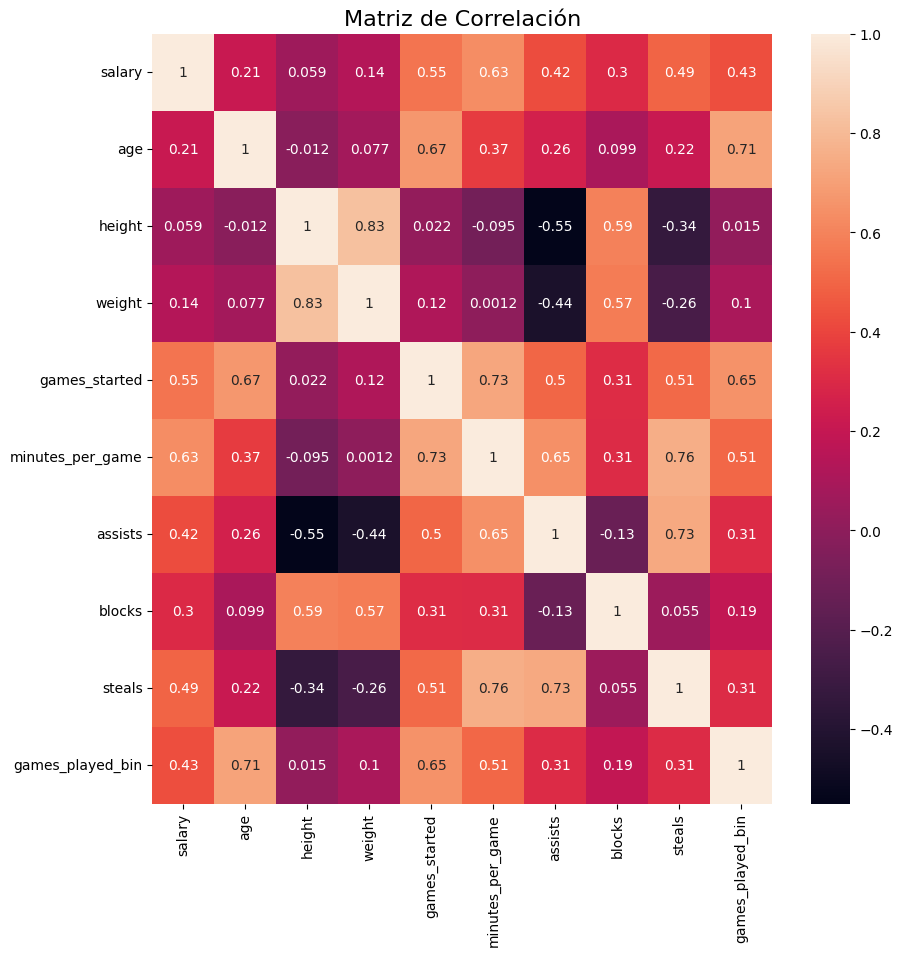

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(XD.corr(), annot=True)
plt.title("Matriz de Correlación", fontsize=16)
plt.show()


**Correlación de las variables**

Las variables más importantes para predecir la cantidad de partidos jugados por un jugador son la edad, el número de partidos como titular y el promedio de minutos jugados por partido.

La edad del jugador (Age) muestra una fuerte correlación positiva (0.71) con la cantidad de partidos jugados. Esto significa que los jugadores de mayor edad, y por lo tanto con más experiencia, tienden a participar en más partidos durante la temporada.

El número de partidos en los que un jugador fue titular (Games_started) también presenta una fuerte correlación (0.65) con la cantidad total de partidos jugados. Es natural que los jugadores que inician más partidos tengan una mayor participación general en la temporada.

El promedio de minutos jugados por partido (Games_per_game) tiene una correlación notable (0.51) con la cantidad de partidos jugados. Esto indica que los jugadores que pasan más tiempo en la cancha por partido tienden a jugar más partidos en total.

In [ ]:
XD1 = XD [['salary', 'age', 'height', 'weight', 'games_started', 'minutes_per_game', 'assists', 'blocks', 'steals']]
yd = XD[['games_played_bin']]

nc= 5
mkm = KMeans(n_clusters=nc, random_state=42) #uso randomstate 42 que significa que será una bd de num aleatorios similares para todos
mkm.fit(XD1, yd)
centroids=mkm.cluster_centers_

print("Los centroides son: \n", centroids)


Los centroides son: 
 [[1.41802870e+07 2.73333333e+01 7.93555556e+01 2.27022222e+02
  3.99488889e+02 2.99444444e+01 3.19555556e+00 6.80000000e-01
  1.06888889e+00]
 [4.04441022e+06 2.75309735e+01 7.95044248e+01 2.23787611e+02
  2.05345133e+02 2.34663717e+01 1.86902655e+00 4.92035398e-01
  7.00884956e-01]
 [8.36209753e+06 2.86140351e+01 7.87894737e+01 2.20438596e+02
  3.64789474e+02 2.72526316e+01 2.56666667e+00 5.10526316e-01
  8.84210526e-01]
 [1.16961665e+06 2.56869159e+01 7.90420561e+01 2.18565421e+02
  1.00037383e+02 1.69682243e+01 1.36308411e+00 3.51401869e-01
  5.46261682e-01]
 [2.08213350e+07 3.00625000e+01 8.04375000e+01 2.38125000e+02
  6.88687500e+02 3.45312500e+01 3.71875000e+00 9.62500000e-01
  1.11875000e+00]]


In [ ]:
XD1= XDB[['salary', 'age', 'height', 'weight', 'games_started', 'minutes_per_game', 'assists', 'blocks', 'steals']]
yd1= XDB[['games_played_bin']]
nc = 5
mkm = KMeans(n_clusters=nc, random_state=42)
mkm.fit(XD1)
centroids = mkm.cluster_centers_

print("Los centroides son: \n")

for centroid in centroids:
    print([f"{x:.2f}" for x in centroid])

Los centroides son: 

['14180286.98', '27.33', '79.36', '227.02', '399.49', '29.94', '3.20', '0.68', '1.07']
['4044410.22', '27.53', '79.50', '223.79', '205.35', '23.47', '1.87', '0.49', '0.70']
['8362097.53', '28.61', '78.79', '220.44', '364.79', '27.25', '2.57', '0.51', '0.88']
['1169616.65', '25.69', '79.04', '218.57', '100.04', '16.97', '1.36', '0.35', '0.55']
['20821335.00', '30.06', '80.44', '238.12', '688.69', '34.53', '3.72', '0.96', '1.12']


In [ ]:
labels=mkm.labels_
XD['labels'] = labels
XD

salary  age  height  weight  games_started  minutes_per_game  assists  \
0      947276   36      79     260            838              32.4      2.7   
1    25000000   37      78     212           1198              36.1      4.7   
2     4088019   39      78     220            954              32.4      3.4   
3     5675000   36      77     195            432              30.9      3.6   
4     5250000   40      83     250           1389              34.0      3.0   
..        ...  ...     ...     ...            ...               ...      ...   
440   1733040   19      78     202              6              14.3      0.6   
441   1140240   21      83     200              4              15.1      0.4   
442   1131960   20      81     220              0               4.2      0.0   
443   3102240   20      77     200             66              30.4      5.5   
444    525093   23      79     185              0               3.5      0.1   

     blocks  steals  games_played_bin  labels  
0       0.5     1.8                 1       3  
1       0.5     1.4                 1       4  
2       0.6     1.1                 1       1  
3       0.2     1.0                 1       1  
4       2.2     0.7                 1       1  
..      ...     ...               ...     ...  
440     0.2     0.4                 0       3  
441     0.5     1.2                 0       3  
442     0.0     0.0                 0       3  
443     0.5     1.0                 0       1  
444     0.0     0.0                 0       3  

[445 rows x 11 columns]

In [ ]:
ND=np.bincount(labels)
print("El tamaño de los clusters es:\n", ND)

El tamaño de los clusters es:
 [ 45 113  57 214  16]


In [ ]:
NAB=XD.groupby('labels').agg({'games_played_bin':lambda x: (x==1).sum ()}) #acá los labels son en que cluster quedo cada persona y le estoy diciendo QUE POR CLUSTER ME AGRUPE LOS QUE SON 1.
NBL=XD.groupby('labels').agg({'games_played_bin':lambda x: (x==0).sum ()})
print("El número de jugadores por encima del promedio por cluster es:\n", NAB)
print("El número de jugadores por debajo del promedio por cluster es:\n", NBL)

El número de jugadores por encima del promedio por cluster es:
         games_played_bin
labels                  
0                     31
1                     54
2                     43
3                     46
4                     16
El número de jugadores por debajo del promedio por cluster es:
         games_played_bin
labels                  
0                     14
1                     59
2                     14
3                    168
4                      0


In [ ]:
NAB["games_played_bin"]=NAB["games_played_bin"]/ND
NBL["games_played_bin"]=NBL["games_played_bin"]/ND
print("El porcentaje de jugadores por encima del promedio es:\n", NAB)
print("El porcentaje de jugadores por debajo del promedio es:\n", NBL)

El porcentaje de jugadores por encima del promedio es:
         games_played_bin
labels                  
0               0.688889
1               0.477876
2               0.754386
3               0.214953
4               1.000000
El porcentaje de jugadores por debajo del promedio es:
         games_played_bin
labels                  
0               0.311111
1               0.522124
2               0.245614
3               0.785047
4               0.000000


In [ ]:
ydp=np.zeros((len(XD),1))
Vab=np.array(NAB);Vbl=np.array(NBL)

for k in range(len(XD)):
 nab=labels[k]

 print("La persona tal:", k)
 print("El cluster al que pertenece", nab)
 print("El porcentaje de aprobación es:",Vab[nab])
 print("El porcentaje de negación es:", Vbl[nab])
 #Me muestra el cluster al que pertenece cada persona

  #consolidamos la informacion de los aprobados y negados

 if Vab[nab]>Vbl[nab]:
    ydp[k]=1
 else:
    ydp[k]=0

La persona tal: 0
El cluster al que pertenece 3
El porcentaje de aprobación es: [0.21495327]
El porcentaje de negación es: [0.78504673]
La persona tal: 1
El cluster al que pertenece 4
El porcentaje de aprobación es: [1.]
El porcentaje de negación es: [0.]
La persona tal: 2
El cluster al que pertenece 1
El porcentaje de aprobación es: [0.47787611]
El porcentaje de negación es: [0.52212389]
La persona tal: 3
El cluster al que pertenece 1
El porcentaje de aprobación es: [0.47787611]
El porcentaje de negación es: [0.52212389]
La persona tal: 4
El cluster al que pertenece 1
El porcentaje de aprobación es: [0.47787611]
El porcentaje de negación es: [0.52212389]
La persona tal: 5
El cluster al que pertenece 2
El porcentaje de aprobación es: [0.75438596]
El porcentaje de negación es: [0.24561404]
La persona tal: 6
El cluster al que pertenece 1
El porcentaje de aprobación es: [0.47787611]
El porcentaje de negación es: [0.52212389]
La persona tal: 7
El cluster al que pertenece 3
El porcentaje de

In [ ]:
cm=confusion_matrix(yd1,ydp)
print("La matriz de confusión es:\n",cm)
VN=cm[0,0];FP=cm[0,1];FN=cm[1,0];VP=cm[1,1]


#Métricas de desempeño
EX=(VP+VN)/(VP+VN+FP+FN) #Exactitud
print('La exactitud del modelo es:\n',EX)

TE=(FN+FP)/(VP+VN+FP+FN) #Tasa de error:
print('La tasa de error del modelo es:\n',TE)

SE=VP/(VP+FN) #Sensibilidad
print('La sensibilidad del modelo es:\n',SE)

SP=VN/(VN+FP) #Especificidad
print('La especificidad del modelo es:\n',SP)

PR=VP/(VP+FP) #Precisión
print('La precisión del modelo es:\n',PR)

PRNeng=VN/(VN+FN) #Precisión Negativa
print('La precisión negativa del modelo es:\n',PRNeng)

La matriz de confusión es:
 [[227  28]
 [100  90]]
La exactitud del modelo es:
 0.7123595505617978
La tasa de error del modelo es:
 0.2876404494382023
La sensibilidad del modelo es:
 0.47368421052631576
La especificidad del modelo es:
 0.8901960784313725
La precisión del modelo es:
 0.7627118644067796
La precisión negativa del modelo es:
 0.6941896024464832


In [ ]:
XDn=([5000000,37,82,245,45,17.8,0.5,1.4,0.4])
ydn=mkm.predict([XDn])
print("La persona pertenece al cluster:\n", mkm.predict([XDn]))
print("La probabilidd de que la persona esté por encima del promedio:\n", Vab[ydn])
print("La probabilidd de que la persona esté por debajo del promedio:\n", Vbl[ydn])

La persona pertenece al cluster:
 [1]
La probabilidd de que la persona esté por encima del promedio:
 [[0.47787611]]
La probabilidd de que la persona esté por debajo del promedio:
 [[0.52212389]]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


**Análisis resultados modelo Kmeans**


Para este modelo se estableció un total de 5 clústeres con el objetivo de agrupar a los jugadores en categorías según sus características. Esto permite analizar la relación entre cada clúster y la variable explicativa, identificando patrones de jugadores con mayor o menor cantidad de juegos disputados en la temporada.

Se encontró que el clúster 4 es el que tiene el mayor porcentaje de jugadores por encima del promedio (100%), lo que indica que los jugadores de este grupo tienen una clara tendencia a disputar más partidos. De manera similar, el clúster 2 también presenta una alta proporción de jugadores por encima del promedio (75.4%), lo que sugiere que este grupo comparte características favorables para una mayor participación en la liga.

Por otro lado, el clúster 3 es el que tiene la mayor cantidad de jugadores debajo del promedio (78.5%), lo que indica que los jugadores en este grupo tienen una menor participación en la temporada. El clúster 1 se encuentra en un punto medio, con un 52.2% de jugadores por debajo del promedio y un 47.8% por encima.

En términos de desempeño del modelo, se obtuvo una exactitud del 71,23%, lo que indica que la segmentación realizada con K-Means logra una clasificación aceptable. En relación a esto, la sensibilidad alcanzó un 47,36%, lo que significa que el modelo falla al detectar los jugadores que juegan más partidos. La especificidad del 89,01% muestra que el modelo si es más preciso al identificar a los jugadores con menos juegos disputados.

Con respecto a un nuevo jugador analizado, se encontró que pertenece al clúster 1, con una probabilidad del 47.8% de estar por encima del promedio y un 52.2% de estar por debajo del promedio.

**Conclusiones finales**

Al evaluar los 3 modelos, Bayes, árbol de decisión y kmeans, se destacan los siguientes resultados

En primer lugar, el modelo con las mejores métricas fue el modelo de árbol de decisión, el cual arrojó una exactitud del 95,5%, es decir, más del 95% de las predicciones del modelo son correctas, por lo que permitirá diferenciar mejor a aquellos jugadores que se encuentren por debajo o por encima del promedio.

En segundo lugar, los modelos de Naive bayes y de kmeans, aunque no tuvieron los mejores resultados, presentaron una buena identificación de jugadores que se encuentran por debajo del promedio, con una especificidad del 92.55% y 89,01% respectivamente.

Finalmente,El modelo de Kmeans fue el que presentó la menor exactitud que alcanzó el 71,23% lo que reduce su confiabilidad.